# THIS IS A PROJECT OF FINDING LIFE EXPECTANCY OF HUMANS USING  VARIOUS FACTORS BUT IN THIS PROJECT WE USE ONLY THESE FACTORS PAST RECORDS, GENDER, AGE ,COUNTRY . 

In [1]:
# PREPARE PROBLEM
# A) LOAD LIBRARIES
# B) LOAD DATASET
# C) DEPLOY MODEL
# D) REPRESENT SAMPLE GRAPH

In [2]:
#PACKAGES
import numpy 
import matplotlib as plt 
import seaborn as sns 
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4cc7adbe2c564c73add35d64ac4d42f2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2pkP7BLIfxq3PMV6GirWPb6QJ1sKKvEh3iIglx7ydxw9',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_4cc7adbe2c564c73add35d64ac4d42f2.get_object(Bucket='lifeexpectancyofhumansusingml-donotdelete-pr-gkctf3cnrp08sf',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.columns
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#to fill missing data
df.fillna(value=df.mean(), inplace = True)
Developed = pd.get_dummies(df['Status'])
Developed.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [4]:
Developed.drop('Developing', axis=1, inplace=True)
df.drop('Status',axis=1, inplace= True)
df = pd.concat([df,Developed], axis=1)
df.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [5]:
#DROP COUNTRY COLUMN

df2 = df.drop('Country',axis=1)
df2.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# create fictitious data set 
simple_life_dataset = pd.DataFrame({'Age':[0, 60], 'Life Expectancy':[50, 30]})
simple_life_dataset.head()

,Age,Life Expectancy
0,0,50
1,60,30


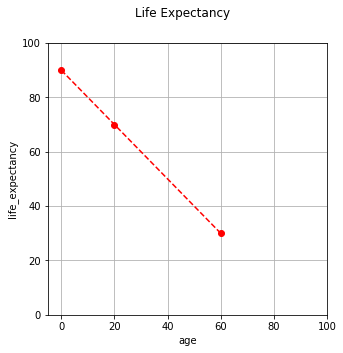

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(5,5))
x = [0,20,60]
y = [90, 70, 30]
axes.plot(x,y, color='red', linestyle='--', marker='o')
fig.suptitle('Life Expectancy')
axes.set_xlabel('age')
axes.set_xlim([-5,100])
axes.set_ylabel('life_expectancy')
axes.set_ylim([0,100])
plt.grid()
plt.show()

In [8]:
# DROP LIFE EXPECTANCY COLUMN

country_info = df2.drop('Life expectancy ', axis =1)
country_info.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0


In [9]:
country_life = df2['Life expectancy ']
country_life.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [10]:
#TRAIN  TEST SPLIT

from sklearn.model_selection import train_test_split
info_train, info_test, life_train, life_test = train_test_split(country_info, country_life, test_size=0.3)


In [11]:
# TRAINING DATA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(country_info, country_life)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

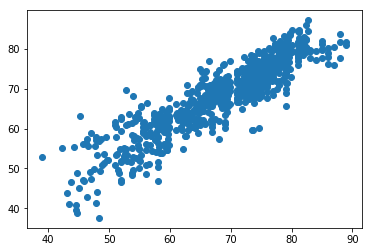

In [12]:
predictions3 = lr.predict(info_test)
plt.scatter(life_test,predictions3)

In [13]:
!pip install watson-machine-learning-client


In [14]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-07-30 22:21:36,859 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [15]:
wml_credentials ={"apikey":"vkpz31MJQwjCCOOahO1YM0f-KCliz2-hEvW7tF2QzcwA",
  "instance_id": "2e9ee6b7-272a-4c56-a71c-bda13ea5b2b2",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [16]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [17]:
metadata = {client.repository.ModelMetaNames.AUTHOR_NAME: "Garima",
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "barthwalgarima03@gmail.com",
               client.repository.ModelMetaNames.NAME: "lifeexpectancy"}

In [18]:
model_details=client.repository.store_model(lr,meta_props=metadata)

In [19]:
published_model_uid = client.repository.get_model_uid(model_details)

In [20]:
published_model_uid


'62c9d8a6-1116-425a-98e8-a8dea379d4f2'

In [21]:
deployment = client.deployments.create(published_model_uid, name="lifeexpectancy")



#######################################################################################

Synchronous deployment creation for uid: '62c9d8a6-1116-425a-98e8-a8dea379d4f2' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='28092cf7-61ec-4b09-b4a9-8f204abae649'
------------------------------------------------------------------------------------------------




In [22]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [23]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2e9ee6b7-272a-4c56-a71c-bda13ea5b2b2/deployments/28092cf7-61ec-4b09-b4a9-8f204abae649/online'